In [1]:
from helpers import *
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
import xgboost as xgb
import numpy as np
from scipy.stats import uniform, randint
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import re
import matplotlib.pyplot as plt
%matplotlib inline

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
goi_id = getGOI()

X_log, y_log, X_log_train, X_log_test, y_log_train, y_log_test = getProcessedData(goi_id)

/home/swagmaster/CD38_Predictor/helpers.py:206: RuntimeWarning: divide by zero encountered in log2
  goi_pat_log = np.log2(goi_pat)


In [3]:
xgb, params = getModelAndBestParams(X_log_train, y_log_train, 10)

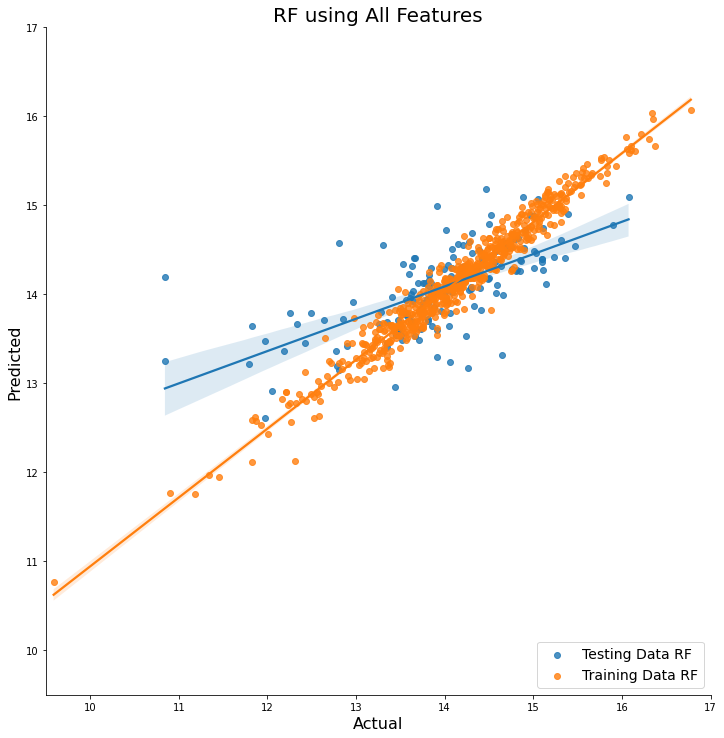

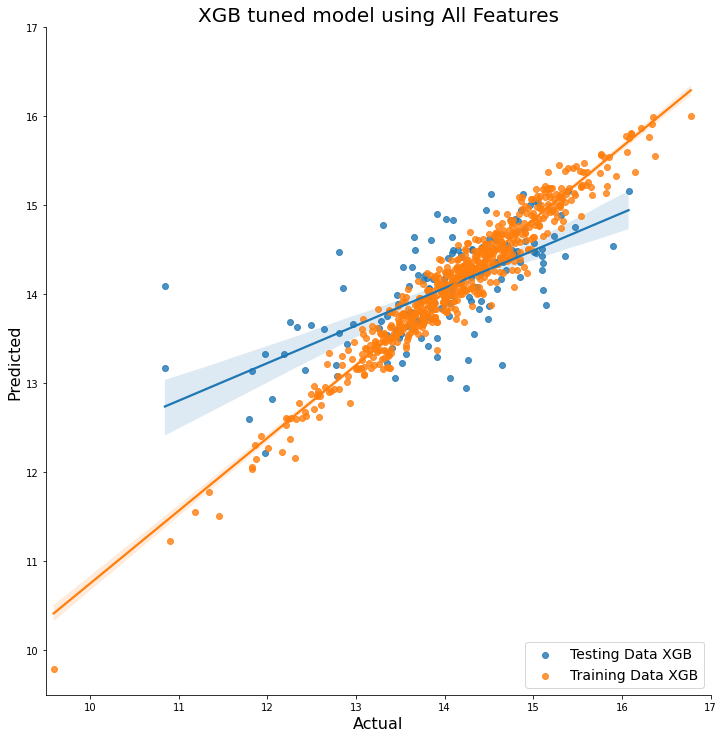

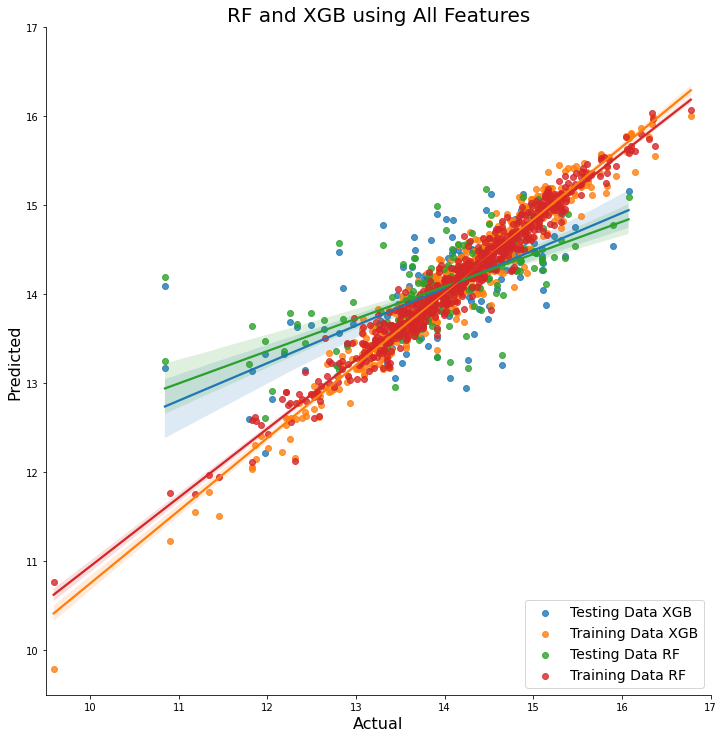

In [4]:
mae = getMAEandPlots(xgb, X_log_train, X_log_test, y_log_train, y_log_test)

In [5]:
X_corr, X_train_corr, X_test_corr = getCorrAndHighCorrFeatures(X_log, y_log, X_log_train, X_log_test)

In [6]:
xgb_corr = buildNewModelAndFit(params, X_train_corr, y_log_train)

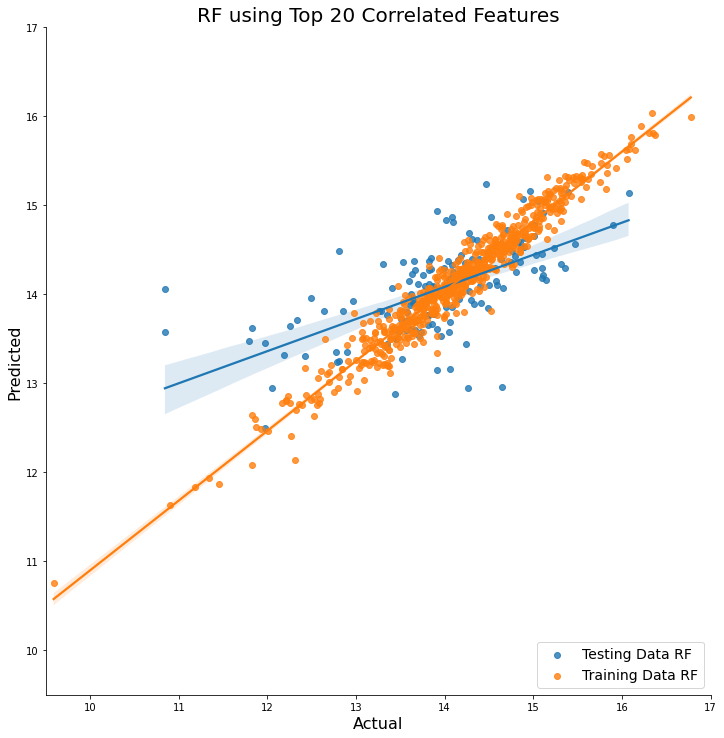

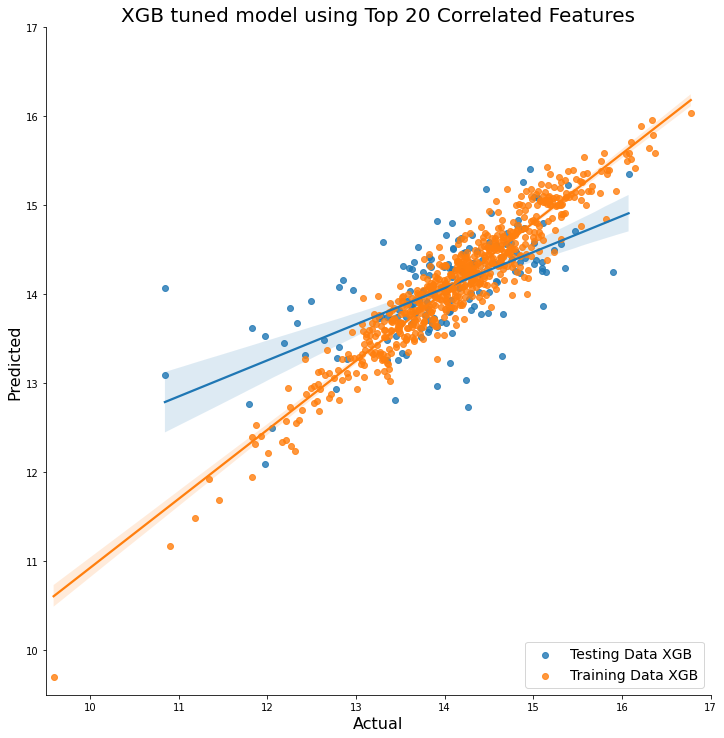

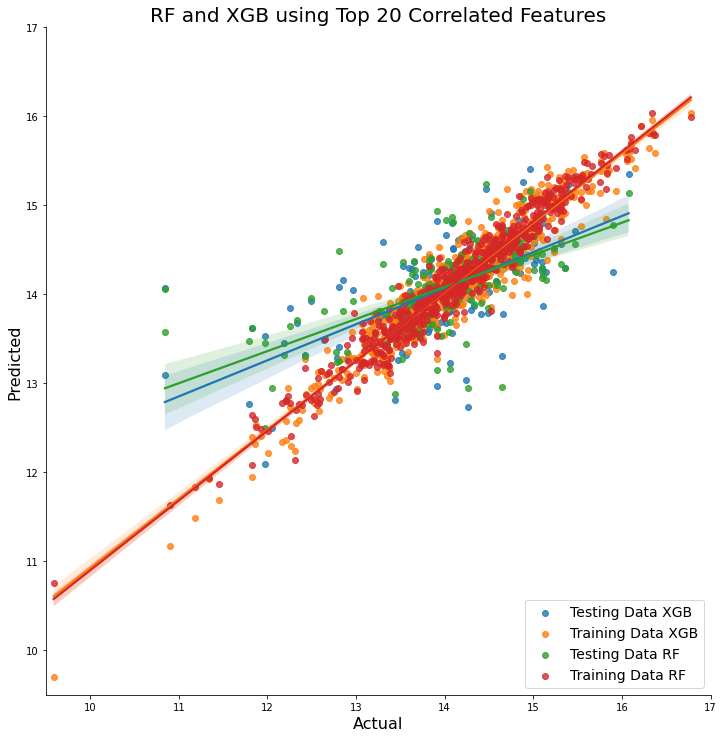

In [7]:
mae_corr = getMAEandPlots(xgb_corr, X_train_corr, X_test_corr, y_log_train, y_log_test, 'Top 20 Correlated Features')

In [8]:
perm_xgb, perm_regr, X_RF_train, X_RF_test, X_XGB_train, X_XGB_test = permImportance(params, X_log_train, X_log_test, y_log_train, y_log_test)

In [9]:
xgb_RF_perm = buildNewModelAndFit(params, X_RF_train, y_log_train)

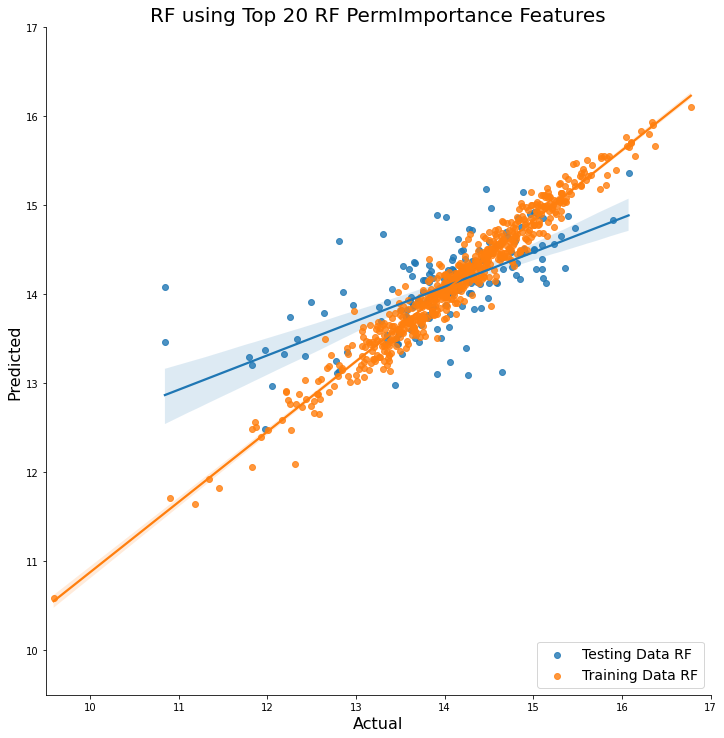

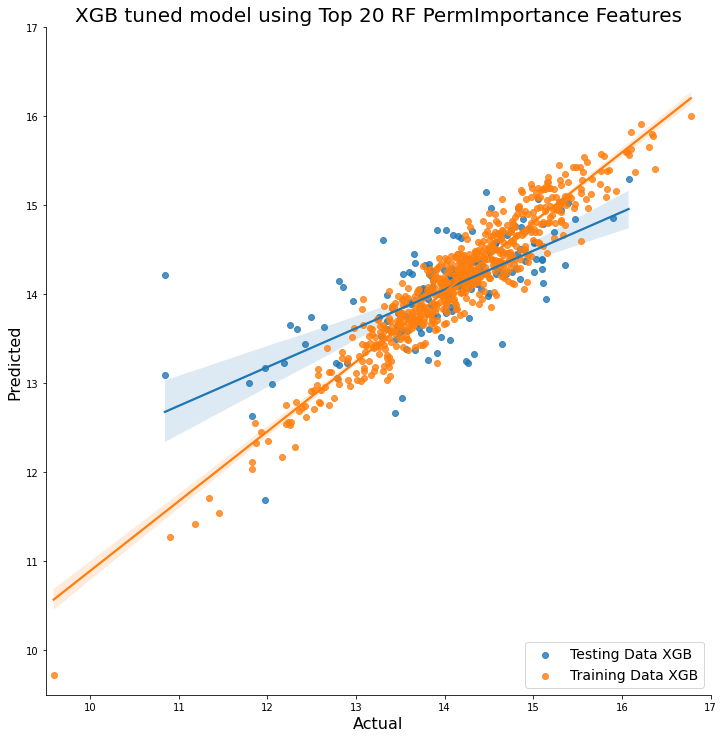

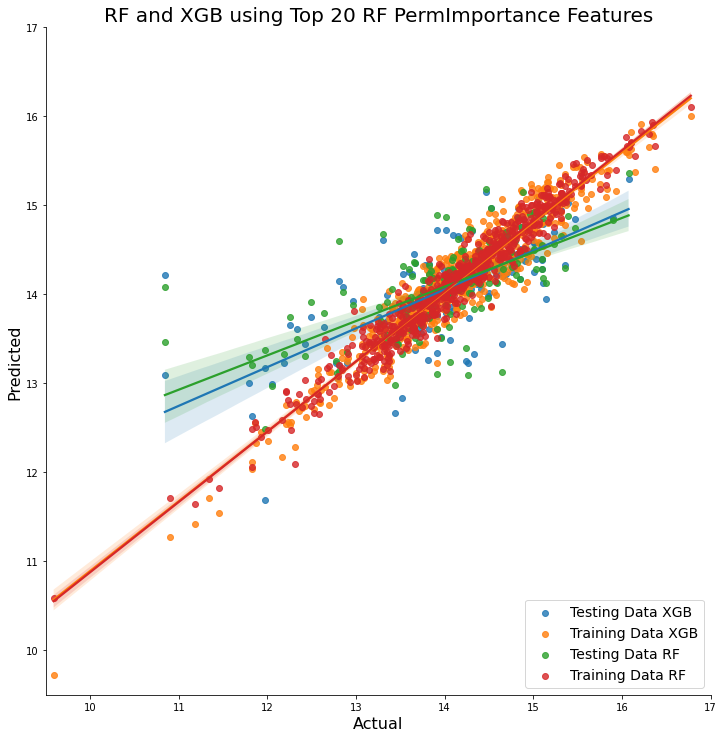

In [10]:
mae_RF_perm = getMAEandPlots(xgb_RF_perm, X_RF_train, X_RF_test, y_log_train, y_log_test, 'Top 20 RF PermImportance Features')

In [11]:
xgb_XGB_perm = buildNewModelAndFit(params, X_XGB_train, y_log_train)

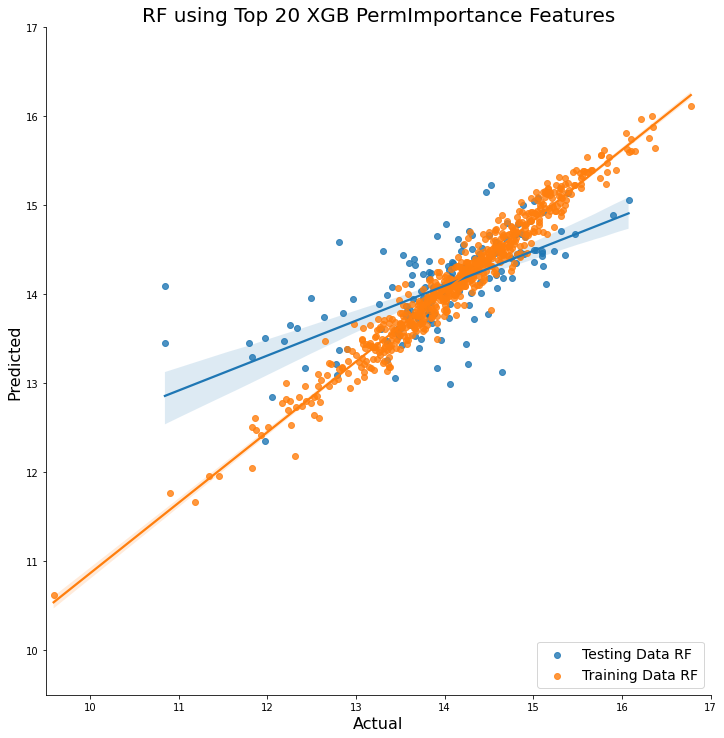

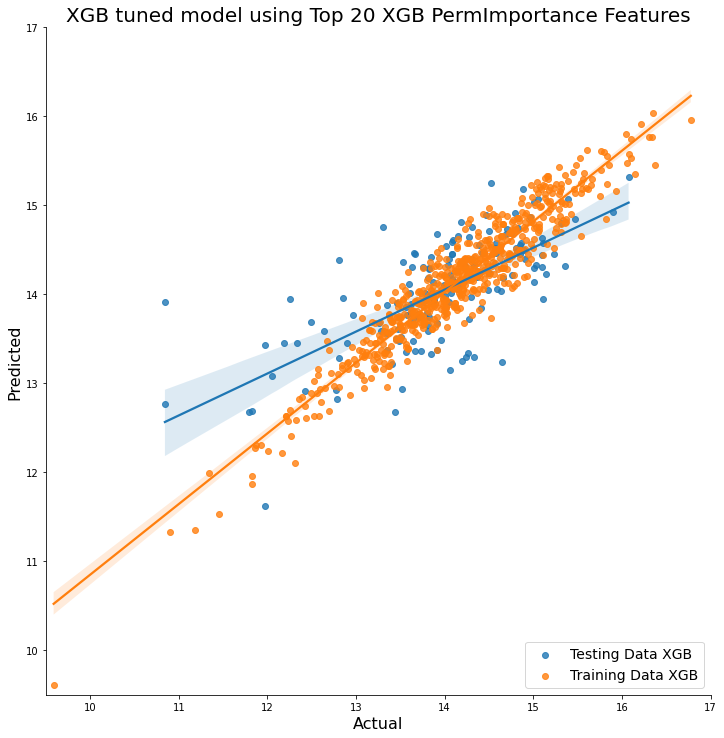

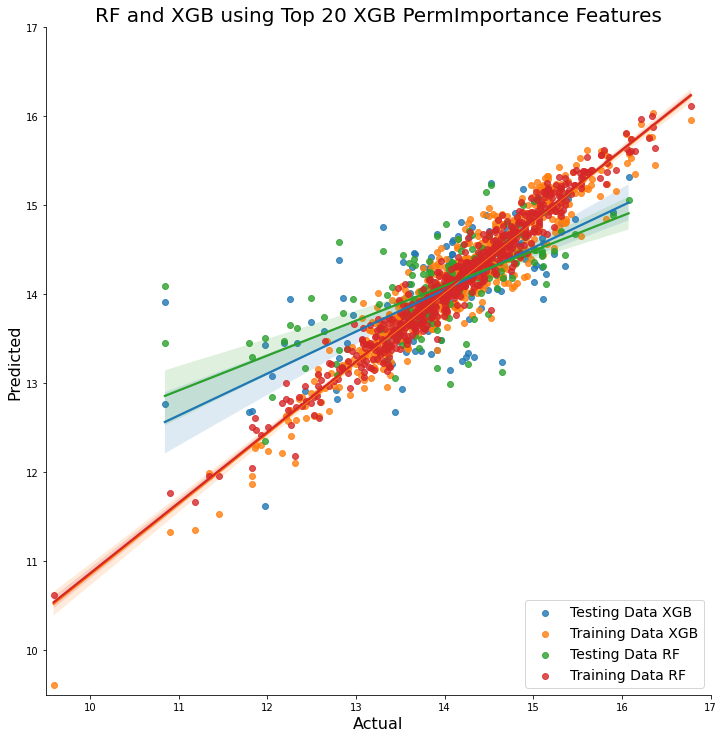

In [12]:
mae_XGB_perm = getMAEandPlots(xgb_XGB_perm, X_XGB_train, X_XGB_test, y_log_train, y_log_test, 'Top 20 XGB PermImportance Features')